# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vio Arvendha
- **Email:** vioarvenda7@gmail.com
- **ID Dicoding:** vio_art7

## Menentukan Pertanyaan Bisnis

- Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
- Pada pukul berapa penyewaan sepeda mencapai jumlah tertinggi dan terendah?
- Di musim apa penyewaan sepeda mengalami peningkatan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Pertama yang di lakukan adalah mengimpor semua library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset "day.csv" dan menampilkan data tabel day beberapa baris pertama.
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca dataset "hour.csv" dan menampilkan data tabel hour beberapa baris pertama.
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data harian terkait peminjaman sepeda.
- Dataset hour.csv berisi data per jam terkait peminjaman sepeda.
- day.csv cocok untuk analisis tren harian, sedangkan hour.csv lebih detail untuk pola penggunaan dalam satu hari.

### Assessing Data

In [4]:
# Tahap ini untuk menilai data dan memeriksa tipe data dari setiap kolom dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [5]:
# Menampilkan informasi mengenai keberadaan missing value pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Menampilkan informasi mengenai keberadaan missing value pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<h5>Dari hasil diatas bisa di simpulkan bahwa tidak ada missing value pada day_hour & hour_df </h5>

In [7]:
# Memeriksa jumlah duplikasi pada day_df dan hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


<h5>Hasil tersebut terlihat bahwa tidak ada data yang duplikat.</h5>

In [8]:
# Kemudian kita lanjut untuk memeriksa parameter statistik dari kolom numerik dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Memeriksa parameter statistik dari kolom numerik dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value dalam dataset day.csv dan hour.csv, sehingga data siap untuk analisis tanpa perlu imputasi.
- Tidak ditemukan data duplikat dalam kedua dataset, sehingga tidak perlu pembersihan lebih lanjut.
- Statistik deskriptif menunjukkan distribusi data numerik dalam dataset, seperti rata-rata, median, dan variasi nilai.
- Pemeriksaan ini memastikan kualitas data baik dan dapat langsung digunakan untuk eksplorasi lebih lanjut.

### Cleaning Data

<h4>Dropping Kolom Data</h4>

In [10]:
# Menghapus kolom instant dan workingday, karena workingday sudah direpresentasikan oleh weekday, sedangkan instant tidak memiliki keterkaitan.
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

<h4>Mengganti tipe data</h4>

In [11]:
# int to category
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', dan 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [12]:
# object to datetime
# Menangani tipe data dteday dengan mengubahnya dari 'object' menjadi 'datetime'.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

<h4>Rename Kolom</h4>

In [13]:
# Mengedit nama kolom dalam dataset day_df untuk lebih mudah dipahami.
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [14]:
# Mengedit nama kolom dalam dataset hour_df agar lebih mudah dipahami.
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [15]:
# Mengonversi nilai pada kolom 'season' menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Mengonversi nilai pada kolom 'month' menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Mengonversi nilai pada kolom 'weather_situation' menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# Mengonversi nilai pada kolom 'one_of_week' menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Mengonversi nilai pada kolom 'year' menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung kelembapan dengan mengalikan nilai dalam kolom 'humidity' dengan 100
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

In [16]:
# Menambahkan kolom 'category_days' yang mengklasifikasikan hari sebagai weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [17]:
# Menambahkan kolom 'humidity_category' untuk mengelompokkan tingkat kelembapan ke dalam kategori tertentu
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

**Insight:**
- Data telah dibersihkan dengan menghapus kolom yang tidak relevan dan mengonversi tipe data untuk analisis yang lebih akurat.
- Kategorisasi musim, bulan, hari, cuaca, dan tahun mempermudah interpretasi tren penyewaan sepeda.
- Klasifikasi kelembapan (humidity category) membantu memahami pengaruh kondisi udara terhadap jumlah penyewaan.
- Penambahan kategori weekend dan weekdays memungkinkan analisis perbedaan pola peminjaman sepeda pada hari kerja dan akhir pekan.

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [18]:
# Menampilkan ringkasan statistik dari dataset hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


<p>Diketahui dari statistik diatas bahwa total jumlah pelanggan mencapai 17.379. Dari data yang tersedia, rentang waktu penyewaan berlangsung antara pukul 00.00 hingga 23.59, dengan rata-rata penyewaan terjadi pada pukul 11.54 dan standar deviasi sebesar 6.91.</p>

In [19]:
# Menganalisis jumlah penyewaan berdasarkan setiap jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


<p>Dapat disimpulkan dari pivot tersebut bahwa jumlah penyewaan sepeda tertinggi terjadi pada pukul 17.00, sedangkan jumlah penyewaan terendah terjadi pada pukul 04.00.</p>

**Insight:**
- Total penyewaan sepeda mencapai 17.379, dengan rata-rata transaksi terjadi sekitar pukul 11:54.
- Puncak penyewaan terjadi pada pukul 17:00, kemungkinan karena jam pulang kerja, sedangkan penyewaan terendah terjadi pada pukul 04:00 saat aktivitas masih minim.

### Explore Data day_df

In [20]:
# Menampilkan ringkasan parameter statistik dari dataset day_df 
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


<p>Dari ringkasan parameter statistik yang telah disajikan, dapat diketahui bahwa jumlah pelanggan pada musim 1 hingga 4 mencapai 17.379 orang. Angka tersebut menunjukkan jumlah pelanggan tertinggi dalam periode tersebut.</p>

In [21]:
# Menampilkan jumlah penyewaan sepeda setiap seasonnya
day_df.groupby(by="season", observed=False).count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


<p>Dari hasil tersebut, dapat disimpulkan bahwa musim gugur (fall) dan musim panas (summer) menempati posisi teratas dalam hal jumlah. Kedua musim ini mencatat angka tertinggi dibandingkan musim lainnya.</p>

In [22]:
# Menampilkan total penyewaan sepeda per tahun berdasarkan kategori registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


<p> Pada table diatas terdapat perbedaan yang cukup signifikan antara individu yang sudah menjadi anggota dan yang belum. Pada tahun 2011, jumlah anggota mencapai 995.851 orang, sedangkan non-anggota hanya sebanyak 247.252. Selain itu, terlihat bahwa pada hari libur nasional, minat dalam penyewaan sepeda cenderung lebih rendah dibandingkan dengan hari-hari biasa. </p>

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (fall) dan musim panas (summer), menunjukkan tren peningkatan permintaan di musim tersebut.
- Penyewaan sepeda oleh anggota (registered) jauh lebih tinggi dibandingkan pengguna kasual (casual), dengan perbedaan signifikan terutama pada tahun 2011.
- Penyewaan sepeda cenderung lebih rendah pada hari libur nasional dibandingkan hari biasa, menunjukkan pola penggunaan yang lebih banyak untuk aktivitas rutin seperti bekerja atau sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?

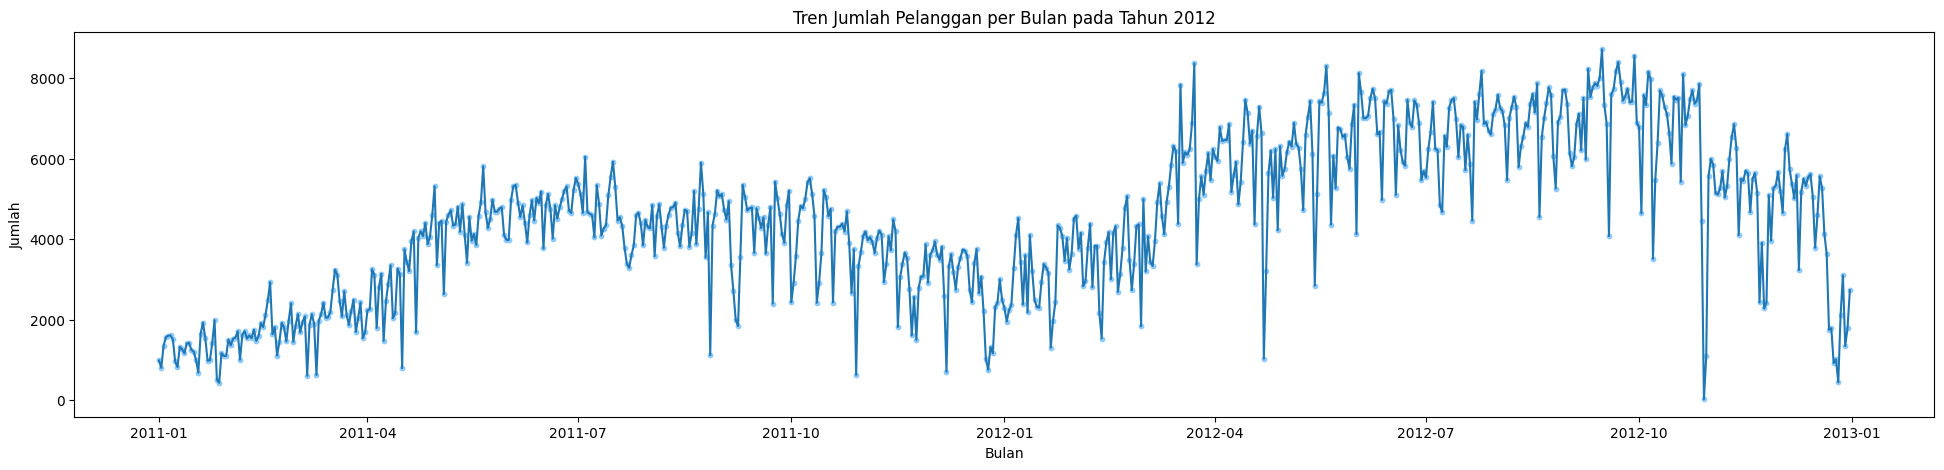

In [23]:
# Mengatur ukuran figure menjadi (24, 5)
plt.figure(figsize=(24, 5))

# Menentukan jumlah pelanggan maksimum dalam setiap bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# Membuat line plot untuk menunjukkan tren jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# Menetapkan label untuk sumbu x
plt.xlabel('Bulan')

# Menetapkan label untuk sumbu y
plt.ylabel('Jumlah')

# Menambahkan judul pada grafik
plt.title('Tren Jumlah Pelanggan per Bulan pada Tahun 2012')

# menampilkan plot
plt.show()

<p>Dari visualisasi di atas, terlihat bahwa jumlah pesanan mencapai puncaknya pada bulan September. Namun, terjadi penurunan yang cukup drastis pada bulan November dan Desember.</p>

**Insight:**
- Jumlah pesanan sepeda mencapai puncaknya pada bulan September, kemungkinan karena cuaca yang mendukung atau meningkatnya aktivitas luar ruangan.
- Terjadi penurunan signifikan pada bulan November dan Desember, yang bisa disebabkan oleh faktor cuaca atau berkurangnya mobilitas pengguna.

### Pertanyaan 2: Pada pukul berapa penyewaan sepeda mencapai jumlah tertinggi dan terendah?

In [24]:
# melakukan grouping terhadap hours dan count_cr 
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

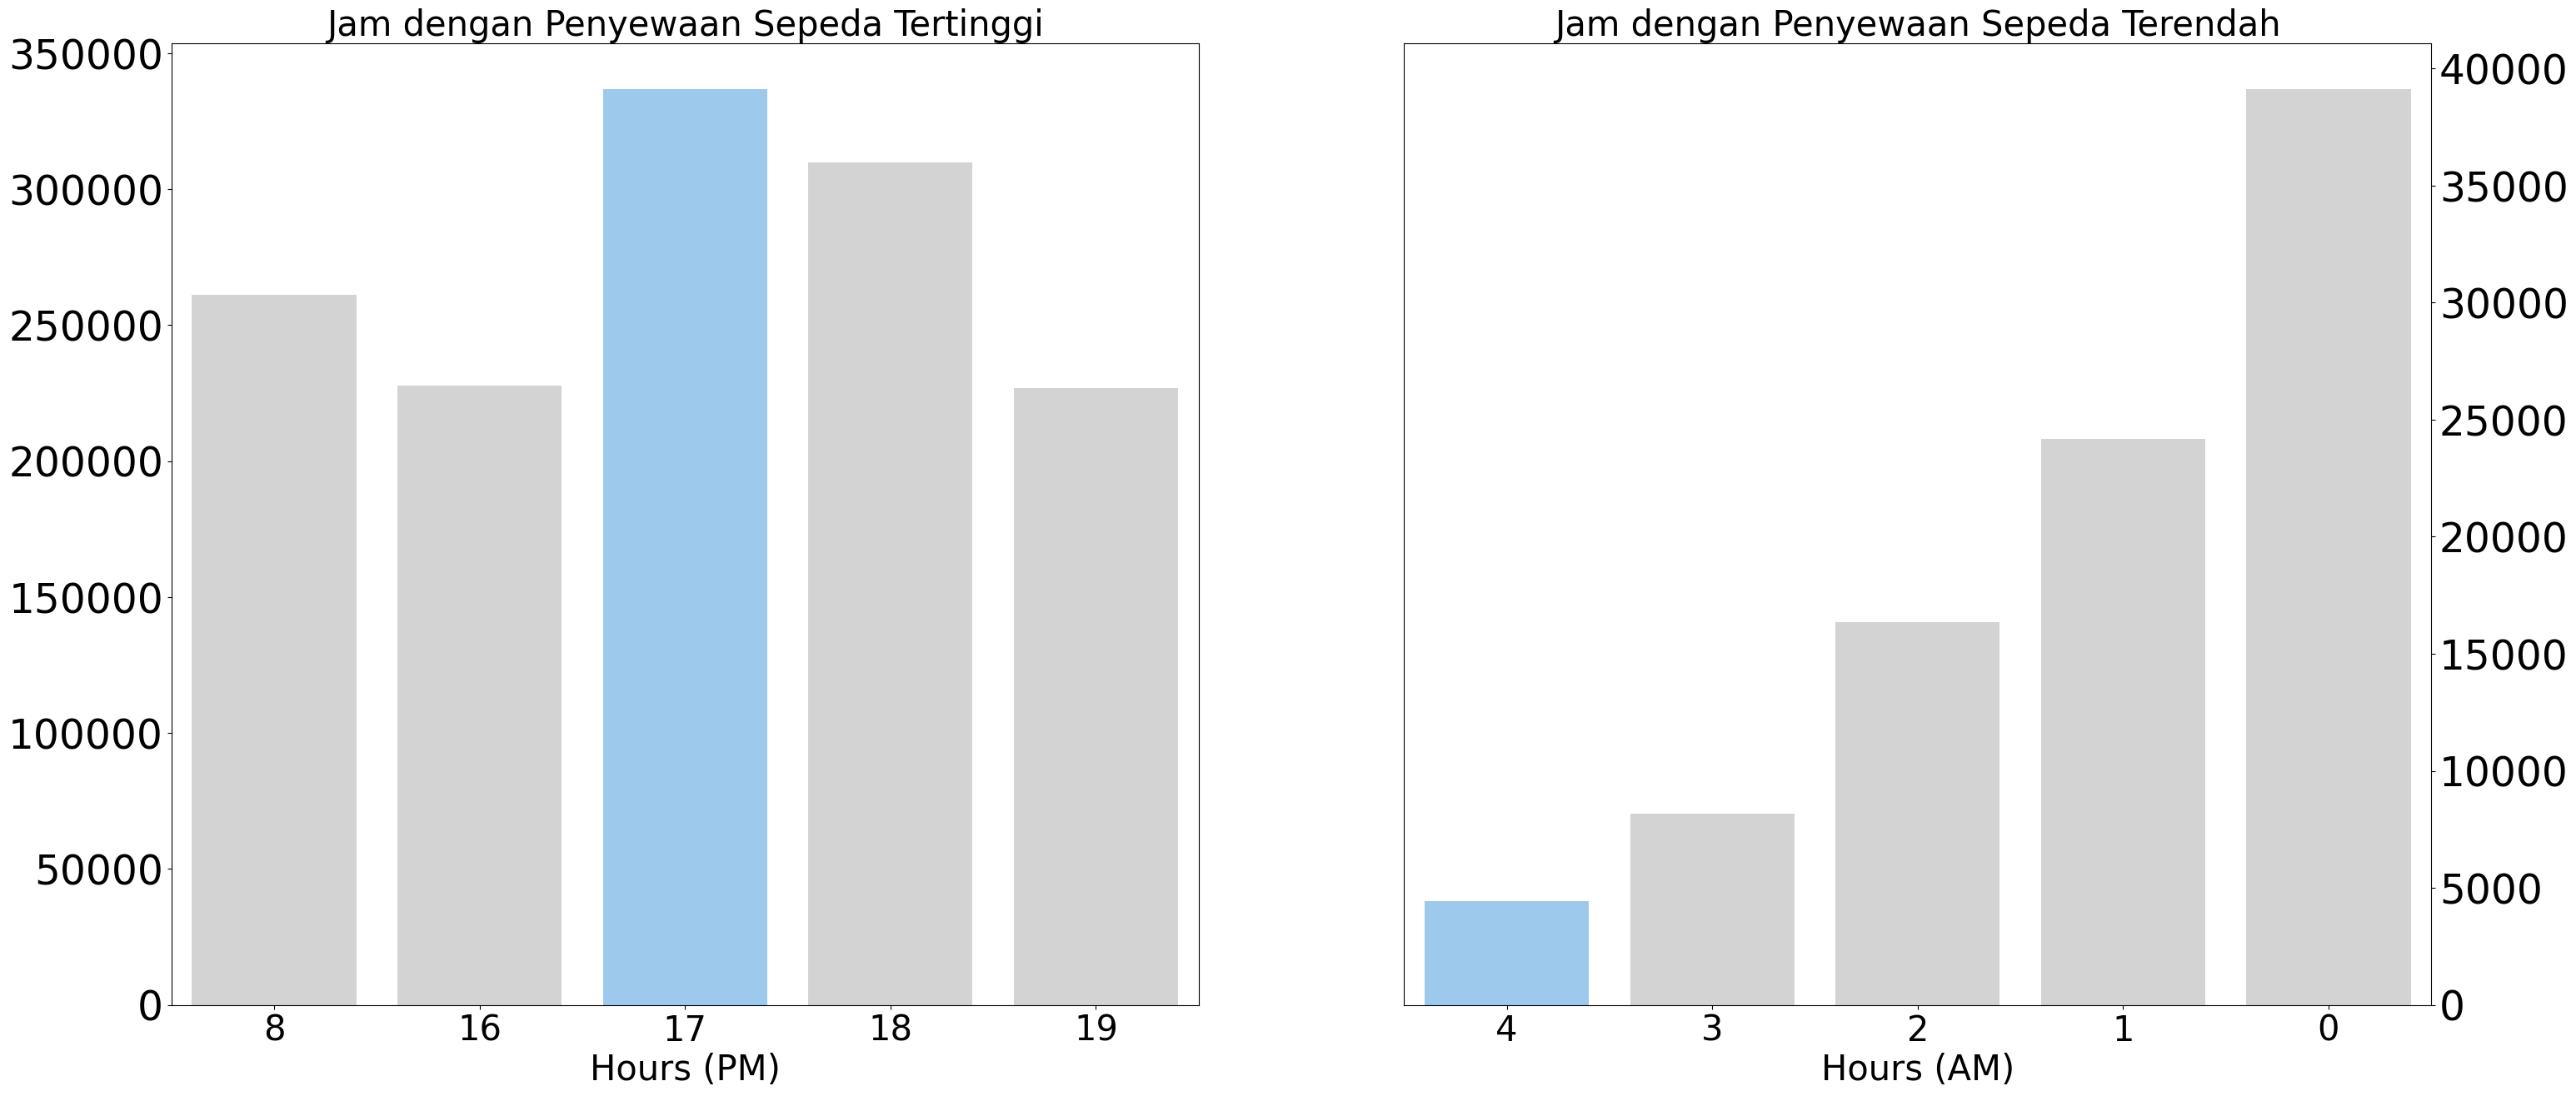

In [25]:
# Membuat bar chart untuk membandingkan jumlah penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))
 
# Membuat barplot untuk jam dengan jumlah penyewaan sepeda tertinggi
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan Penyewaan Sepeda Tertinggi", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Membuat barplot untuk jam dengan jumlah penyewaan sepeda terendah
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])

# Mengatur label dan judul untuk subplot pertama
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan Penyewaan Sepeda Terendah", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menampilkan visualisasi
plt.show()

<p>Dari visualisasi tersebut, terlihat bahwa jumlah tertinggi penyewaan sepeda terjadi pada pukul 17:00 dengan total sekitar 336.860 penyewaan. Sebaliknya, pada pukul 04:00, jumlah penyewaan jauh lebih rendah, hanya mencapai sekitar 4.428 penyewaan.</p>

**Insight:**
- Puncak penyewaan sepeda terjadi pada pukul 17:00, kemungkinan karena jam pulang kerja atau aktivitas sore.
- Penyewaan sepeda paling rendah terjadi pada pukul 04:00, yang dapat dikaitkan dengan waktu dini hari ketika aktivitas masyarakat masih minim.

### Pertanyaan 3: Di musim apa penyewaan sepeda mengalami peningkatan tertinggi?

C:\Users\Asus\.virtualenvs\dicoding-SFGD4jSA\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


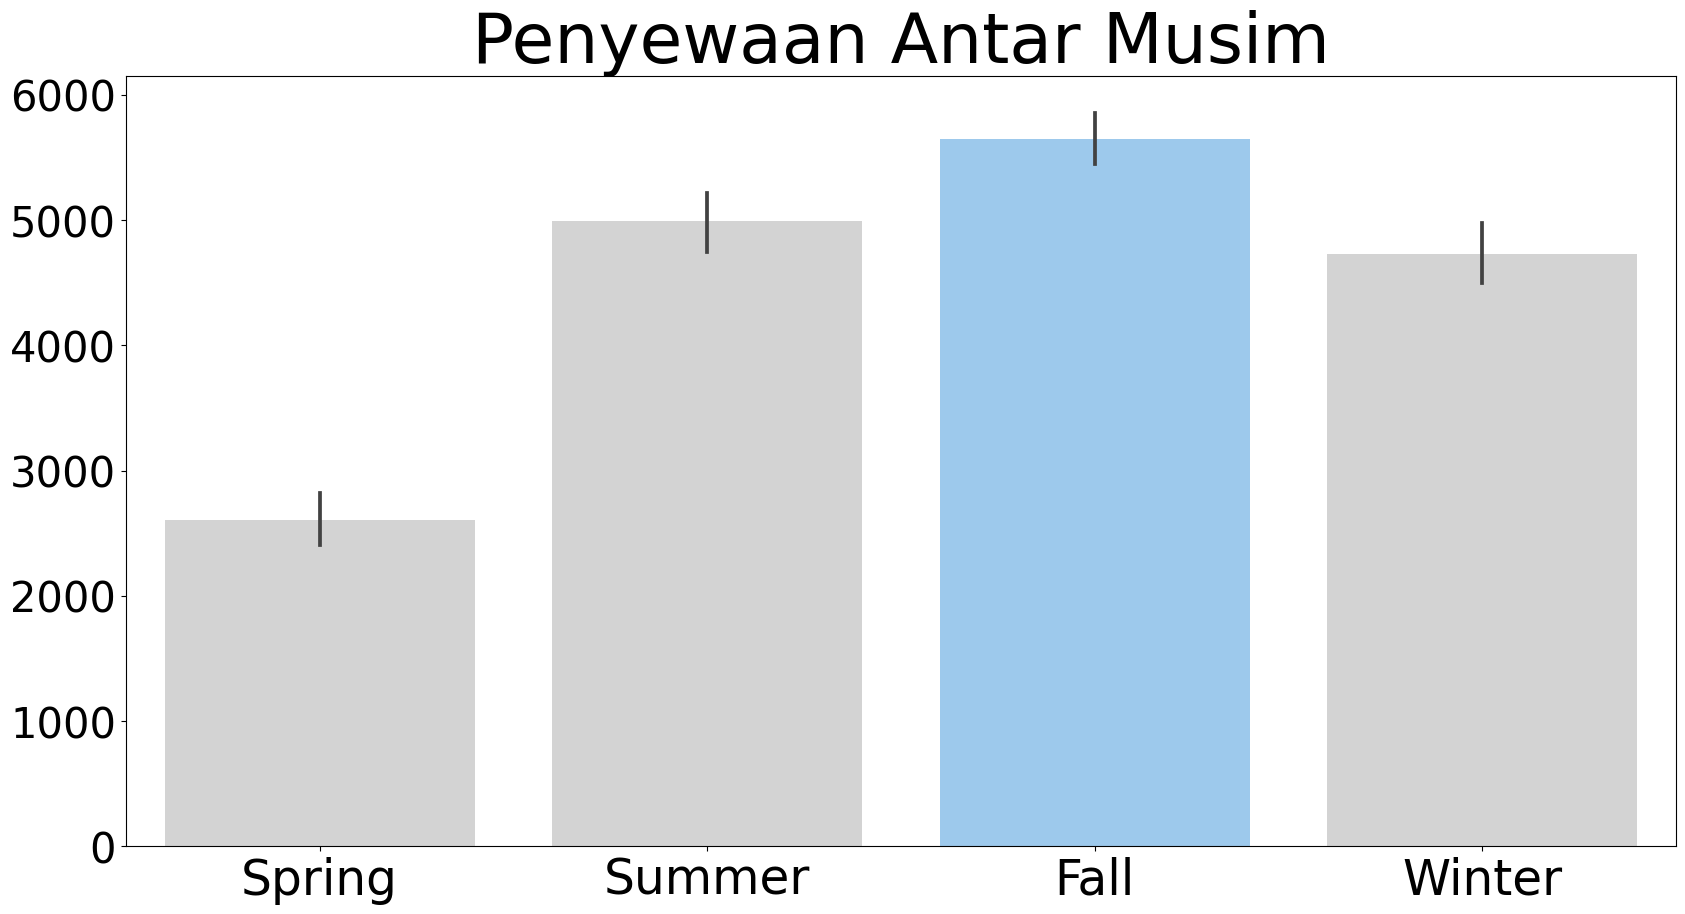

In [26]:
# Menentukan warna
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# Membuat subplot dengan 1 baris dan 1 kolom dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Membuat Bar Chart untuk y="count_cr" dan x="season", menggunakan dataset day_df
sns.barplot(
        y="count_cr", 
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )

# Mengatur judul, label sumbu, dan tick params untuk subplot tersebut
ax.set_title("Penyewaan Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan visualisasi
plt.show()


**Insight:**
- Musim dengan jumlah penyewaan tertinggi adalah musim gugur (Fall), dengan total sebanyak 1061129 penyewaan.

## Analisis Lanjutan (Opsional)

<h4>RFM Analysis</h4>

RFM Analysis digunakan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [27]:
# Menentukan tanggal terbaru dalam dataset
current_date = max(hour_df['dteday'])

# Mengelompokkan data berdasarkan 'registered' untuk menghitung nilai RFM (Recency, Frequency, Monetary)
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengubah nama kolom agar lebih mudah dipahami
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Menampilkan 5 baris pertama dari DataFrame yang telah diproses
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


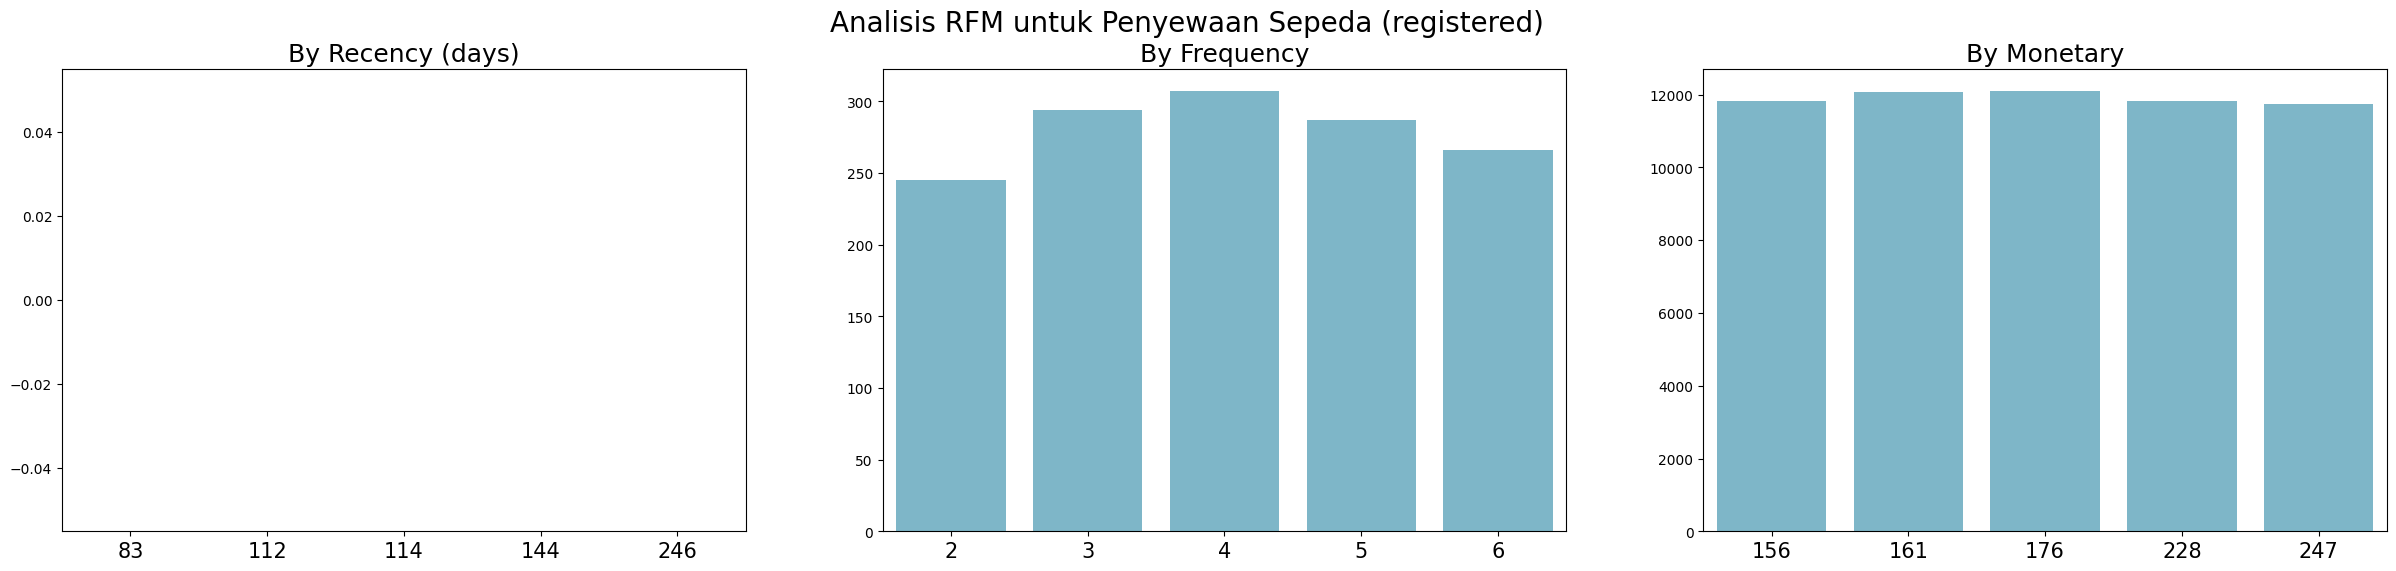

In [28]:
# Membuat subplot dengan 3 kolom untuk menampilkan 3 grafik RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Menentukan palet warna yang digunakan untuk semua grafik
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Menampilkan grafik batang berdasarkan nilai Recency (berapa hari sejak terakhir menyewa)
sns.barplot(y="Recency", x="registered", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Menampilkan grafik batang berdasarkan jumlah transaksi (Frequency)
sns.barplot(y="Frequency", x="registered", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Menampilkan grafik batang berdasarkan total pengeluaran (Monetary)
sns.barplot(y="Monetary", x="registered", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Menampilkan seluruh grafik
plt.suptitle("Analisis RFM untuk Penyewaan Sepeda (registered)", fontsize=20)
plt.show()

**Insight:**
- Data Recency kosong atau memiliki nilai yang tidak bervariasi, sehingga seaborn gagal menggambar batang
- Grafik menunjukkan bahwa pengguna terdaftar dengan ID 3 dan 4 memiliki frekuensi penyewaan tertinggi, yaitu sekitar 280 kali.
- Semua pengguna dalam top 5 memiliki nilai Monetary yang hampir sama (sekitar kurang lebih 12.000).

<h4>Clustering</h4> 

In [29]:
# Jumlah pengguna berdasarkan weather_situation
hour_df.groupby(by="weather_situation", observed=False).count_cr.nunique().sort_values(ascending=False)

weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

In [30]:
# Jumlah pengguna berdasarkan humadity
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


**Insight:**
- Pengguna lebih cenderung menyewa sepeda pada hari-hari dengan cuaca cerah (clear weather), dibandingkan dengan kondisi cuaca lainnya.
- Tingkat kelembaban yang terlalu tinggi dapat mempengaruhi jumlah penyewaan sepeda, dengan pola tertentu yang menunjukkan preferensi pengguna terhadap kondisi kelembaban tertentu.

## Conclusion

In [31]:
day_df.to_csv("day_clean.csv", index=False)

In [32]:
hour_df.to_csv("hour_clean.csv", index=False)

- Conclution pertanyaan 1: Penjualan sepeda meningkat pada September, kemungkinan karena cuaca atau aktivitas luar ruangan, lalu menurun signifikan di November-Desember akibat faktor cuaca atau mobilitas pengguna.
- Conclution pertanyaan 2: Penyewaan sepeda tertinggi pada pukul 17:00 karena jam pulang kerja atau aktivitas sore, sedangkan terendah pada pukul 04:00 karena minimnya aktivitas di dini hari.
- Conclution pertanyaan 3: Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), kemungkinan karena cuaca yang lebih nyaman untuk beraktivitas di luar ruangan.